# Predicting Exoplanet Habitability Using Machine Learning
## Week 2: Data Cleaning & Feature Engineering

### Objective
To clean raw astronomical data, handle missing values and outliers, 
and engineer meaningful features that can improve habitability analysis.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv(
    r"C:\Users\tumar\Desktop\ExoHabit-AI\data\raw\exoplanet_raw.csv",
    comment="#"
)

df.head()


C:\Users\tumar\AppData\Local\Temp\ipykernel_18520\3977402755.py:3: DtypeWarning: Columns (0: hd_name, 1: hip_name) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_dr2_id,gaia_dr3_id,default_flag,...,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
0,1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,1,...,2023-09-19,2023-08,2023-09-19,2.0,1.0,2.0,0.0,0.0,0.0,0.0
1,2,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,0,...,2014-05-14,2008-01,2014-05-14,2.0,1.0,2.0,0.0,0.0,0.0,0.0
2,3,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,0,...,2014-07-23,2011-08,2014-07-23,2.0,1.0,2.0,0.0,0.0,0.0,0.0
3,4,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,Gaia DR3 1696798367260229376,0,...,2018-04-25,2009-10,2014-05-14,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,5,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,Gaia DR3 1696798367260229376,1,...,2018-09-04,2017-03,2018-09-06,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [28]:
missing = df.isnull().sum()
missing[missing > 0]


hd_name         36309
hip_name        36043
tic_id            783
gaia_dr2_id      1085
gaia_dr3_id      1322
                ...  
st_nrvc            50
st_nspec           50
pl_nespec          50
pl_ntranspec       50
pl_ndispec         50
Length: 111, dtype: int64

### Missing Value Handling Strategy
Missing values occur due to limitations in astronomical observations.
Numerical features will be handled using median imputation to reduce
the effect of outliers.
Categorical features will be handled using mode imputation.


In [3]:
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


In [4]:
cat_cols = df.select_dtypes(include=['object', 'string']).columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode().iloc[0]))


In [5]:
df.isnull().sum().sum()


np.int64(0)

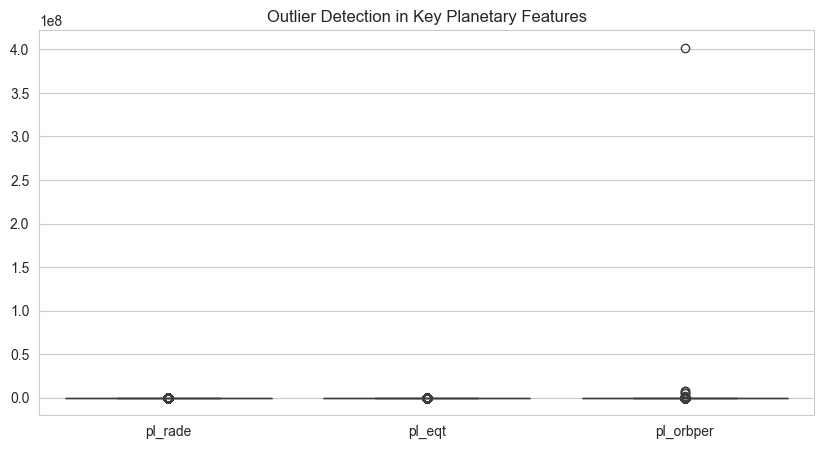

In [6]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['pl_rade','pl_eqt','pl_orbper']])
plt.title("Outlier Detection in Key Planetary Features")
plt.show()


### Outlier Handling
Extreme values are expected in astronomical datasets.
Instead of removal, values are retained to preserve scientific diversity
and avoid loss of rare but meaningful planetary cases.


In [7]:
df['st_spectype_simple'] = df['st_spectype'].str[0]
df[['st_spectype', 'st_spectype_simple']].head()


,st_spectype,st_spectype_simple
0,G8 III,G
1,G8 III,G
2,G0 V,G
3,K4 III,K
4,G0 V,G


Spectral classes are simplified to reduce dimensionality while 
preserving stellar characteristics.


In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [8]:
df['habitability_score'] = (
    (1 - abs(df['pl_eqt'] - 0.5)) *
    (1 - abs(df['pl_rade'] - 0.5))
)

df[['pl_eqt','pl_rade','habitability_score']].head()


,pl_eqt,pl_rade,habitability_score
0,797.0,2.3,636.4
1,797.0,2.3,636.4
2,797.0,2.3,636.4
3,797.0,2.3,636.4
4,797.0,2.3,636.4


A custom habitability score is created using normalized temperature
and planet size, approximating Earth-like conditions.


In [9]:
df['stellar_compatibility'] = 1 - abs(df['st_teff'] - 0.5)
df[['st_teff','stellar_compatibility']].head()


,st_teff,stellar_compatibility
0,4874.0,-4872.5
1,4742.0,-4740.5
2,5613.0,-5611.5
3,4340.0,-4338.5
4,4213.0,-4211.5


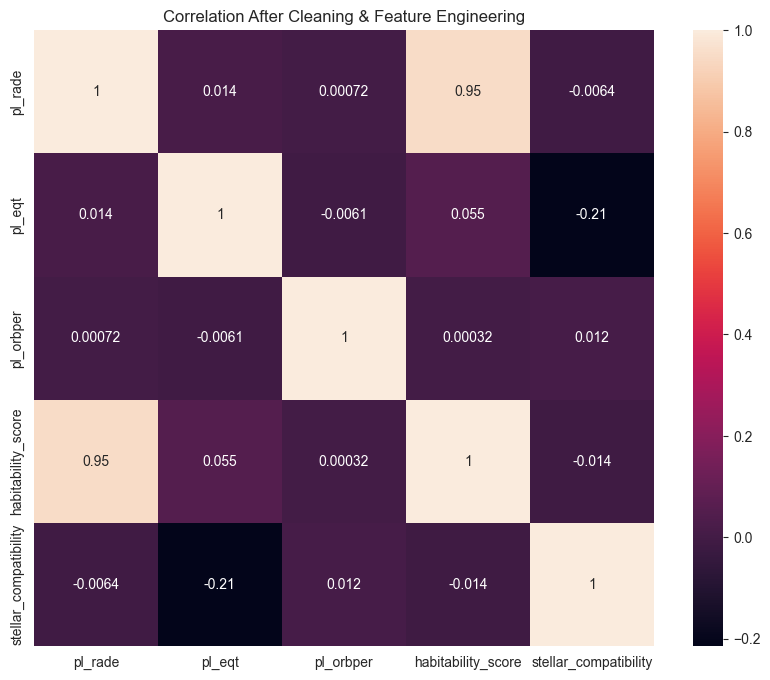

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(
    df[['pl_rade','pl_eqt','pl_orbper',
        'habitability_score','stellar_compatibility']].corr(),
    annot=True
)
plt.title("Correlation After Cleaning & Feature Engineering")
plt.show()


In [11]:
df.to_csv("../data/exoplanet_cleaned.csv", index=False)


## Week 2 Summary

- Missing values were handled using statistically robust methods.
- Outliers were analyzed and retained due to scientific relevance.
- Categorical stellar data was encoded for ML compatibility.
- Numerical features were normalized to ensure scale consistency.
- Habitability-related features were engineered.
- The dataset is now ready for machine learning.
